# Projet de prédiction de fraude

**Algo de prédiction de fraude**

**DataSet -> IpAddress_to_Country.csv , Fraud_Data.csv**

**Etude de donnée = 15 min**

**Joiture sur l'adresse Ip**

**Entrainement -> fit**

In [ ]:
import warnings #warning message 
warnings.simplefilter('ignore')

#Importation des libraires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
Addresses = pd.read_csv('../content/sample_data/IpAddress_to_Country.csv')
Addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [ ]:
fraudes = pd.read_csv('../content/sample_data/Fraud_Data.csv',parse_dates=['signup_time', 'purchase_time'])
fraudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 12.7+ MB


**Avant tous on vérifie la présence de valeur null et NaN**

In [ ]:
print(fraudes.isna().sum())
print(fraudes.isnull().sum())

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [ ]:
print(Addresses.isna().sum())
print(Addresses.isnull().sum())

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


**Itération d'un un dataframe , avec la création d'un masque (sous dataFrame triée), si le dataFrame posséde un élément ce sera le pays  (->intervale d'ip) dans lequel l'adresse Ip est comprise.**

In [ ]:
countries = []
for i in range(len(fraudes)):
  ip_address = fraudes.loc[i,"ip_address"]
  tmp = Addresses[(Addresses['lower_bound_ip_address'] <= ip_address) &
                        (Addresses['upper_bound_ip_address'] >= ip_address)] #Création d'un masque (sous dataFrame avec une condition)

  if(len(tmp) == 1):
    countries.append(tmp['country'].values[0]) #annalyse et récupération de la valeurs
  else:
    countries.append('NA') #Ip ne correspondant a aucun pay (aucun interval)
fraudes['country'] = countries
fraudes

user_id         signup_time  ... class        country
0         22058 2015-02-24 22:55:49  ...     0          Japan
1        333320 2015-06-07 20:39:50  ...     0  United States
2          1359 2015-01-01 18:52:44  ...     1  United States
3        150084 2015-04-28 21:13:25  ...     0             NA
4        221365 2015-07-21 07:09:52  ...     0  United States
...         ...                 ...  ...   ...            ...
151107   345170 2015-01-27 03:03:34  ...     1  United States
151108   274471 2015-05-15 17:43:29  ...     0    Netherlands
151109   368416 2015-03-03 23:07:31  ...     0          Japan
151110   207709 2015-07-09 20:06:07  ...     0  United States
151111   138208 2015-06-10 07:02:20  ...     0             NA

[151112 rows x 12 columns]

In [ ]:
#Ajout d'une nouvelle colonne 
fraudes['time_diff']=0

for i in range(len(fraudes)):
  fraudes.loc[i,"time_diff"] = abs(pd.to_datetime(fraudes.loc[i,"signup_time"]) - pd.to_datetime(fraudes.loc[i,"purchase_time"])).total_seconds()#Convert to seconde for result
fraudes.info()

KeyboardInterrupt: ignored

In [ ]:
fraudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  float64       
 10  class           151112 non-null  int64         
 11  country         151112 non-null  object        
 12  time_diff       151112 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(5), object(5)
memory usage: 15.0+ MB


**Optimisation time diff**

In [ ]:
time_diff = fraudes['purchase_time'] - fraudes['signup_time'] # opération sur deux series 
time_diff = time_diff.apply(lambda x: x.total_seconds()) #fonction lamda plus rapide 
fraudes['time_diff'] = time_diff
time_diff

0         4506682.0
1           17944.0
2               1.0
3          492085.0
4         4361461.0
            ...    
151107    5261233.0
151108     931270.0
151109    6681616.0
151110    5146119.0
151111    3524493.0
Length: 151112, dtype: float64

In [ ]:
fraudes.head()

user_id         signup_time  ...        country  time_diff
0    22058 2015-02-24 22:55:49  ...          Japan  4506682.0
1   333320 2015-06-07 20:39:50  ...  United States    17944.0
2     1359 2015-01-01 18:52:44  ...  United States        1.0
3   150084 2015-04-28 21:13:25  ...             NA   492085.0
4   221365 2015-07-21 07:09:52  ...  United States  4361461.0

[5 rows x 13 columns]

In [ ]:
#fraudesDevices = fraudes[fraudes['user_id']&fraudes['device_id']]

#tchecker nb device par user -> group_by devide_id , 
#jours de la semaine -> week, dayofWeek sur le datetime
#label encodeur sklearn 

g = fraudes.groupby('device_id').count().reset_index(); #reset_index() -> recalcule des indexs 
g

device_id  user_id  signup_time  ...  class  country  time_diff
0       AAALBGNHHVMKG        1            1  ...      1        1          1
1       AAAWIHVCQELTP        1            1  ...      1        1          1
2       AAAXJHWCLISKY        1            1  ...      1        1          1
3       AAAXXOZJRZRAO       11           11  ...     11       11         11
4       AABFGRPBQHWFQ        1            1  ...      1        1          1
...               ...      ...          ...  ...    ...      ...        ...
137951  ZZZGSIJRNCXBJ        1            1  ...      1        1          1
137952  ZZZIKLJSVSQMF        1            1  ...      1        1          1
137953  ZZZKJIZHJEDFN        1            1  ...      1        1          1
137954  ZZZMVOGBAJVTM        1            1  ...      1        1          1
137955  ZZZXASJUVUNMV        1            1  ...      1        1          1

[137956 rows x 13 columns]

On peut observer que le device AAAXXOZJRZRAO est utilisé par 11 utilisateur ayant fait 11 inscription et 11 paiment. Cette observation pourais nous aider dans la prédiction d'une fraude. En effet 11 utilisateur sur un meme post (device_id) est suspicieux.

In [ ]:
device_num = fraudes[['user_id', 'device_id']].groupby('device_id').count().reset_index()
device_num = device_num.rename(columns={'user_id': 'device_num'})
fraudes = fraudes.merge(device_num, how='left', on='device_id')
fraudes

user_id         signup_time  ...  time_diff  device_num
0         22058 2015-02-24 22:55:49  ...  4506682.0           1
1        333320 2015-06-07 20:39:50  ...    17944.0           1
2          1359 2015-01-01 18:52:44  ...        1.0          12
3        150084 2015-04-28 21:13:25  ...   492085.0           1
4        221365 2015-07-21 07:09:52  ...  4361461.0           1
...         ...                 ...  ...        ...         ...
151107   345170 2015-01-27 03:03:34  ...  5261233.0           2
151108   274471 2015-05-15 17:43:29  ...   931270.0           1
151109   368416 2015-03-03 23:07:31  ...  6681616.0           1
151110   207709 2015-07-09 20:06:07  ...  5146119.0           2
151111   138208 2015-06-10 07:02:20  ...  3524493.0           1

[151112 rows x 14 columns]

De meme sur le deuxiéme affichages on peux observer que le device YSSKYOSJHPPLJ est utilisé par 12 utilisateur ayant effectuer 15 paiments 




In [ ]:
ip_num = fraudes[['user_id', 'ip_address']].groupby('ip_address').count().reset_index()
ip_num 

ip_address  user_id
0       5.209350e+04        1
1       9.344714e+04        1
2       1.058185e+05        1
3       1.175667e+05        1
4       1.314238e+05        1
...              ...      ...
143507  4.294674e+09        1
143508  4.294715e+09        1
143509  4.294720e+09        1
143510  4.294822e+09        1
143511  4.294850e+09        1

[143512 rows x 2 columns]

**On fait de méme pour le nombre d'adresse ip par utilisateurs**

In [ ]:
ip_num = ip_num.rename(columns={'user_id': 'ip_num'})
fraudes = fraudes.merge(ip_num, how='left', on='ip_address')
fraudes

user_id         signup_time  ... device_num  ip_num
0         22058 2015-02-24 22:55:49  ...          1       1
1        333320 2015-06-07 20:39:50  ...          1       1
2          1359 2015-01-01 18:52:44  ...         12      12
3        150084 2015-04-28 21:13:25  ...          1       1
4        221365 2015-07-21 07:09:52  ...          1       1
...         ...                 ...  ...        ...     ...
151107   345170 2015-01-27 03:03:34  ...          2       1
151108   274471 2015-05-15 17:43:29  ...          1       1
151109   368416 2015-03-03 23:07:31  ...          1       1
151110   207709 2015-07-09 20:06:07  ...          2       1
151111   138208 2015-06-10 07:02:20  ...          1       1

[151112 rows x 15 columns]

**On fait la différenciation entre les jours de la semaine et le week pour le nombre de date d'insciption et d'achat**

In [ ]:
# Signup day and week
fraudes['signup_day'] = fraudes['signup_time'].apply(lambda x: x.dayofweek)
fraudes['signup_week'] = fraudes['signup_time'].apply(lambda x: x.week)
# Purchase day and week
fraudes['purchase_day'] = fraudes['purchase_time'].apply(lambda x: x.dayofweek)
fraudes['purchase_week'] = fraudes['purchase_time'].apply(lambda x: x.week)

**On affiche nos nouvelles colonnes**

In [ ]:
# Define features and target to be used
columns = ['signup_day', 'signup_week', 'purchase_day', 'purchase_week', 'purchase_value', 'source', 
           'browser', 'sex', 'age', 'country', 'time_diff', 'device_num', 'ip_num', 'class']
fraudes = fraudes[columns]
fraudes.head()

signup_day  signup_week  purchase_day  ...  device_num  ip_num class
0           1            9             5  ...           1       1     0
1           6           23             0  ...           1       1     0
2           3            1             3  ...          12      12     1
3           1           18             0  ...           1       1     0
4           1           30             2  ...           1       1     0

[5 rows x 14 columns]

**Passont maintenant a l'encodage des donnée ( encodage : true/false, index (0,1,2,3), label encodeur sklearn).**

Exemple d'encodage de label

In [ ]:
X = [ "bleu", "rouge", "vert", "rouge", "jaune", "orange", "bleu", "vert", "rouge", "rouge", "orange" ]
label_encoder = LabelEncoder()
X_labels = label_encoder.fit_transform(" ".join(X).split(" "))
print("Clés d'encodage :", label_encoder.classes_)
print("Résultat de l'encodage par labels :", X_labels)


Clés de décodage : ['bleu' 'jaune' 'orange' 'rouge' 'vert']
Résultat de l'encodage par labels : [0 3 4 3 1 2 0 4 3 3 2]


On remarque en regardant les index et le tableau que nous avons bien encoder notre X suivant la clés de d'encodage

On vas maintenant chercher a remplacer les object de notre dataSet par un encodage numéric pour pouvoir les traiters

In [ ]:
X= fraudes[columns[:-1]] # on retire la derniere colonne des class 
X

signup_day  signup_week  purchase_day  ...  time_diff  device_num ip_num
0                1            9             5  ...  4506682.0           1      1
1                6           23             0  ...    17944.0           1      1
2                3            1             3  ...        1.0          12     12
3                1           18             0  ...   492085.0           1      1
4                1           30             2  ...  4361461.0           1      1
...            ...          ...           ...  ...        ...         ...    ...
151107           1            5             6  ...  5261233.0           2      1
151108           4           20             1  ...   931270.0           1      1
151109           1           10             2  ...  6681616.0           1      1
151110           3           28             0  ...  5146119.0           2      1
151111           2           24             1  ...  3524493.0           1      1

[151112 rows x 13 columns]

**Correction de l'encodage**

In [ ]:

X = fraudes[columns[:-1]]#on prend tous sauf la derniere colonnes de class qui est ce qu'on recherche donc notre taget 
y = fraudes['class'] # nos classes (target) 0 - non fraudeur -> 1 fraudeur 
#On peux donc commencer a entrainer notre algorihtme apres en plitant nos donnée train/test

#on crée nos encodage 
source_labelEncoder = LabelEncoder()
browser_labelEncoder = LabelEncoder()
sex_labelEncoder = LabelEncoder()
country_labelEncoder = LabelEncoder()

#on les applique au colonnes de notre dataSet
X['source'] = source_labelEncoder.fit_transform(fraudes['source'])
X['browser'] = browser_labelEncoder.fit_transform(fraudes['browser'])
X['sex'] = sex_labelEncoder.fit_transform(fraudes['sex'])
X['country'] = country_labelEncoder.fit_transform(fraudes['country'])
X

signup_day  signup_week  purchase_day  ...  time_diff  device_num  ip_num
0                1            9             5  ...  4506682.0           1       1
1                6           23             0  ...    17944.0           1       1
2                3            1             3  ...        1.0          12      12
3                1           18             0  ...   492085.0           1       1
4                1           30             2  ...  4361461.0           1       1
...            ...          ...           ...  ...        ...         ...     ...
151107           1            5             6  ...  5261233.0           2       1
151108           4           20             1  ...   931270.0           1       1
151109           1           10             2  ...  6681616.0           1       1
151110           3           28             0  ...  5146119.0           2       1
151111           2           24             1  ...  3524493.0           1       1

[151112 rows x 13 columns]

In [ ]:
fraudes["source"] = X['source']
fraudes["browser"] = X['browser']
fraudes["sex"] = X['sex']
fraudes["country"] = X['country']
fraudes

signup_day  signup_week  purchase_day  ...  device_num  ip_num  class
0                1            9             5  ...           1       1      0
1                6           23             0  ...           1       1      0
2                3            1             3  ...          12      12      1
3                1           18             0  ...           1       1      0
4                1           30             2  ...           1       1      0
...            ...          ...           ...  ...         ...     ...    ...
151107           1            5             6  ...           2       1      1
151108           4           20             1  ...           1       1      0
151109           1           10             2  ...           1       1      0
151110           3           28             0  ...           2       1      0
151111           2           24             1  ...           1       1      0

[151112 rows x 14 columns]

On peut observer que les colonnes on bien étaient encodée. Maintenant on vas splite nos données pour pouvoir entrainer notre algo

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print("Shape du dataset d'entrainement : {} | Shape du dataset de test {}".format(X_train.shape, X_test.shape))

Shape du dataset d'entrainement : (105778, 13) | Shape du dataset de test (45334, 13)


**On observe un séparation 70% train 30% test**

Enssuite on essaye d'instancier un RandomForestClasifier et de l'entrainer sur nos données

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


**Avec ces prédiction on cherche la préscision moyenne de notre prédiction pour 10 validation croisée.**

In [ ]:
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy').mean()
print("L'accurancy moyenne pour 10 'fold cross validation est {}%".format(round(scores*100,2)))

L'accurancy moyenne pour 10 'fold cross validation est 95.56%


**Caractéristiques influent sur la fraude.**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=columns[:-1]).sort_values(ascending=False)
feature_imp

time_diff         0.264396
purchase_week     0.183160
device_num        0.124882
signup_week       0.078331
ip_num            0.076147
purchase_value    0.065968
age               0.056804
country           0.041460
signup_day        0.032551
purchase_day      0.030510
browser           0.022344
source            0.012696
sex               0.010751
dtype: float64

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     41177
           1       0.99      0.55      0.71      4157

    accuracy                           0.96     45334
   macro avg       0.98      0.77      0.84     45334
weighted avg       0.96      0.96      0.95     45334



**On peux retrouver notre le taux de préscision de 96 % de notre algorithme.**

**Visualisation**

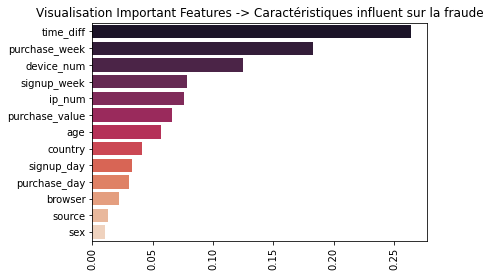

In [ ]:
import seaborn as sns; 
sns.barplot(x= feature_imp.values, y= feature_imp.index, palette='rocket')
plt.xticks(rotation='vertical') # mise des noms des personnage en vertical pour une meilleur visibilité 
plt.title('Visualisation Important Features -> Caractéristiques influent sur la fraude')
plt.show()

On peut time diff est l'élement le plus important si on veux déterminer si il y fraude ou non, de plus on peux voire que les achats en weekend et le nombre de "device" son également des critéres qui semble influencer l'existance d'une fraude.

**Courbe AUC la fonction d’efficacité du récepteur** trace la courbe en fonction du taux de vrais positifs et du taux de faux positif.

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics


fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="Test AUC:"+str(auc))
plt.legend(loc=4)
plt.show()

On peux remarquée que notre modéle est performant a 77,48 % , il prédit donc a 77% des vrais positif quand il le faut et donc environ 23% de faux positif.

**Matrice de confusion**

In [ ]:
mc = metrics.confusion_matrix(y_test,y_pred)
mc

array([[41165,    12],
       [ 1871,  2286]])

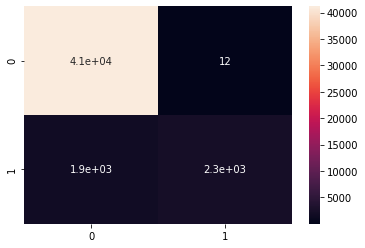

In [ ]:
sns.heatmap(mc,annot=True)

On peux remarquer que nous avons beaucoup de faux négatif  (1871) , et quelque faux positif (12).

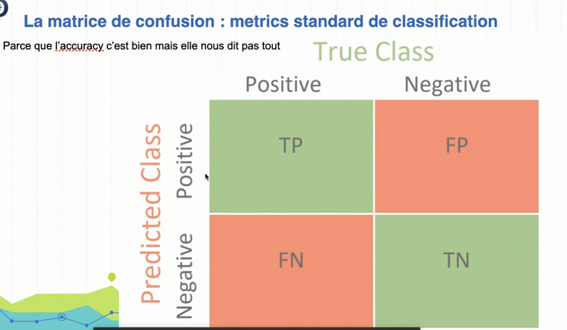